<a href="https://colab.research.google.com/github/tokyo8182/TensorFlow/blob/main/4_1_Building_a_Convolutional_Neural_Network_in_TensorFlow_2_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.12.0'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [2]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


### Image normalization

In [4]:
X_train = X_train / 255.0

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test = X_test / 255.0

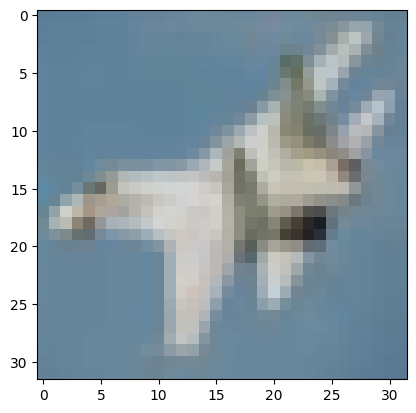

In [7]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [8]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [9]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [10]:
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))

In [11]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the third CNN Layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu
    input_shape: (32, 32, 3)


In [12]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

###  Adding the fourth CNN Layer and max pool layer

CNN layer hyper-parameters:

    filters: 64
    kernel_size:3
    padding: same
    activation: relu

MaxPool layer hyper-parameters:

    pool_size: 2
    strides: 2
    padding: valid


In [13]:
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding="same", activation="relu"))

In [14]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

### Adding the Flatten layer

In [15]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [16]:
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [17]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

## HOMEWORK SOLUTION

- Increased the number of epochs from 5 to 15

### Training the model

In [23]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 21s 5ms/step - loss: 1.3764 - sparse_categorical_accuracy: 0.5033
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9293 - sparse_categorical_accuracy: 0.6715
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7509 - sparse_categorical_accuracy: 0.7366
Epoch 4/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6325 - sparse_categorical_accuracy: 0.7790
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5381 - sparse_categorical_accuracy: 0.8116
Epoch 6/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4496 - sparse_categorical_accuracy: 0.8409
Epoch 7/15
1563/1563 [==============================] - 9s 6ms/step - loss: 0.3769 - sparse_categorical_accuracy: 0.8663
Epoch 8/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3086 - sparse_categorical_accuracy: 0.8897
Epoch 9/15
1563/1563 [=======

### Model evaluation and prediction

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.6142 - sparse_categorical_accuracy: 0.7244


In [22]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.724399983882904
